# Research Proposal : UFC Does age matter?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats

df = pd.read_csv('fight_data.csv')

In [2]:
df.shape

(1477, 895)

In [3]:
df = df[['B_Name', 'R_Name', 'winner', 'B_Age', 'R_Age', 'winby', 'B_Location', 'R_Location', 'Date', 'R_Height', 'B_Height', 'Last_round', 'Max_round', 'B_Weight', 'R_Weight']]

## Data Description

 This data set contains every UFC fight from 2013 up to the second quarter of 2017. Each row represents a single fight. 
Data is organized by Blue vs Red. There are 1477 observations and 895 columns. In this Research Proposal we will be interested in the age columns.

In [4]:
df.head()

,B_Name,R_Name,winner,B_Age,R_Age,winby,B_Location,R_Location,Date,R_Height,B_Height,Last_round,Max_round,B_Weight,R_Weight
0,Marvin Vettori,Antonio Carlos Junior,red,23.0,27.0,DEC,Mezzocorona Italy,"Coconut Creek, Florida United States",01/02/2017,187,182.0,3,3,84,84
1,Carlos Diego Ferreira,Colton Smith,blue,32.0,29.0,SUB,"Pharr, Texas USA","Fort Hood, TX USA",06/30/2014,182,175.0,1,3,70,70
2,Takanori Gomi,Joe Lauzon,red,38.0,32.0,KO/TKO,Tokyo Japan,"Bridgewater, Massachusetts USA",07/27/2015,177,172.0,1,3,70,70
3,Brandon Moreno,Louis Smolka,blue,23.0,25.0,SUB,Tijuana Mexico,"Kapolei, HI USA",10/03/2016,175,170.0,1,3,56,56
4,Elizabeth Phillips,Raquel Pennington,red,30.0,28.0,DEC,"Spokane, WA USA","Colorado Spring, Colorado United States",08/22/2016,170,167.0,3,3,61,61


# Research Proposal
  Does age have an impact on outcomes?

## Hypothesis
  I expect young fighters will have an easier time winning.

## Method of Testing
  We are going to use three columns: Blues age column, Reds age column, and the winner column. With these colums we will create two new columns. Which will be the age of the winner and the age of the loser. There will be 1,477 observations for each column. Comparing these two populations will help us better understand our question.
 
## Outcomes
  We will then use plots to understand the data, and a t-test to ensure that there is a statistical significance to our two data sets. If our T-test scores a P-Value less than 0.05 , then we can conclude with confidance that age does infact have an impact on performance.

In [5]:
#Creating new columns:

#creating new columns, winners age and losers age
df['winners_age'] = np.where((df['winner'] == 'red'), df['R_Age'], df['B_Age'])
df['losers_age'] = np.where((df['winner'] == 'red'), df['B_Age'], df['R_Age'])

#Cleaning some Data, using wikipedia birthdate and 'Date' Column.
df.set_value(525, 'R_Age', 38)
df.set_value(237, 'R_Age', 40)
df.set_value(31,'R_Age', 20)
print()

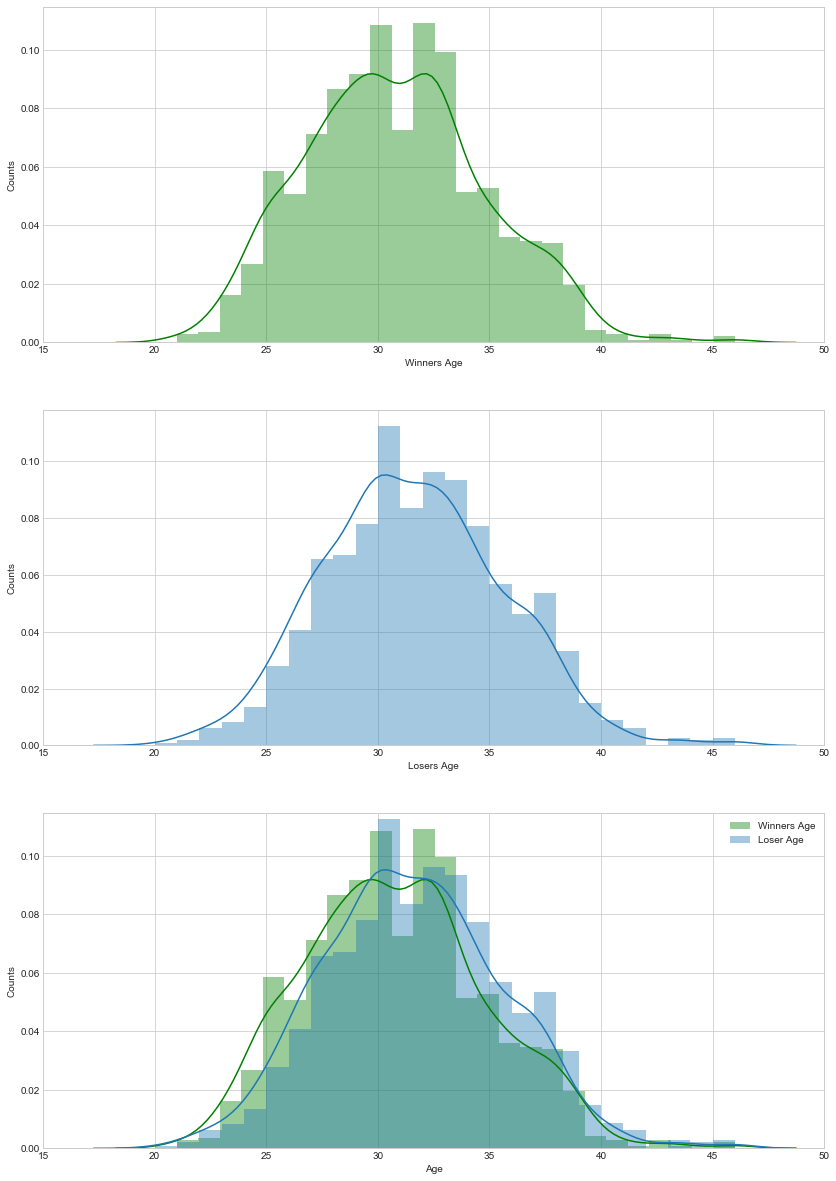

In [6]:
plt.figure(figsize=(14, 21))
plt.subplot(311)
sns.distplot(df['winners_age'].dropna(), bins=26, color='g', label='Winners Age')
plt.ylabel('Counts')
plt.xlabel('Winners Age')
plt.xlim((15, 50))

plt.subplot(312)
sns.distplot(df['losers_age'].dropna(), bins=26, label='Loser Age') 
plt.ylabel('Counts')
plt.xlabel('Losers Age')
plt.xlim((15, 50))

plt.subplot(313)
sns.distplot(df['winners_age'].dropna(), bins=26, color='g', label='Winners Age') 
sns.distplot(df['losers_age'].dropna(), bins=26, label='Loser Age')
plt.xlim((15, 50))
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

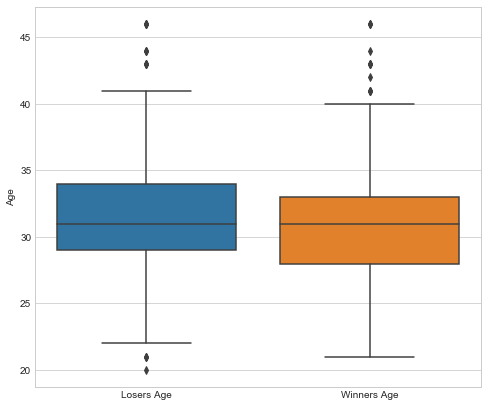

In [7]:
age_list = {'Losers Age' : df['losers_age'].dropna(), 
            'Winners Age' : df['winners_age'].dropna()
            }
new_df = pd.DataFrame(data=age_list)

plt.figure(figsize=(8, 7))
sns.boxplot(data=new_df)
plt.ylabel('Age')
plt.show()

Comparing our graphs here, the winners age graph sits lower on the age range. On the winners age box plot both whiskers, the top 25% and the bottom 25% of our data, sit lower on the age range when compared to our losers age boxplot. The interquartile of our winners age box plot hangs low below it's mean of 30.79, and the losers age interquartile sits high above it's mean of 31.54. The boxplot comparison here between losers age and winners age shows how young fighters win more often.

In [12]:
#Executing our T-test
stats.ttest_ind(df['losers_age'].dropna(),
                df['winners_age'].dropna())

Ttest_indResult(statistic=5.0119710613784214, pvalue=5.70575287080876e-07)

## Conclusion

  Our P-value was 5.70575287080876e-07 Which is much lower than our target P-value of less than 0.05 . Our T-test was statistically significant! This tells us that the difference between our two sets of data, winners age and losers age, is not due to random chance. We can attribute this difference to our winner variable. Which tells us that indeed young fighters do win more often. 